In [2]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load saved model weights "model_weights.h5"
model = tf.keras.models.load_model('model_weights_DC.h5')

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 180, 180, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 90, 90, 128)          3584      ['rescaling[0][0]']           
                                                                                                  
 batch_normalization (Batch  (None, 90, 90, 128)          512       ['conv2d[0][0]']              
 Normalization)                                                                               

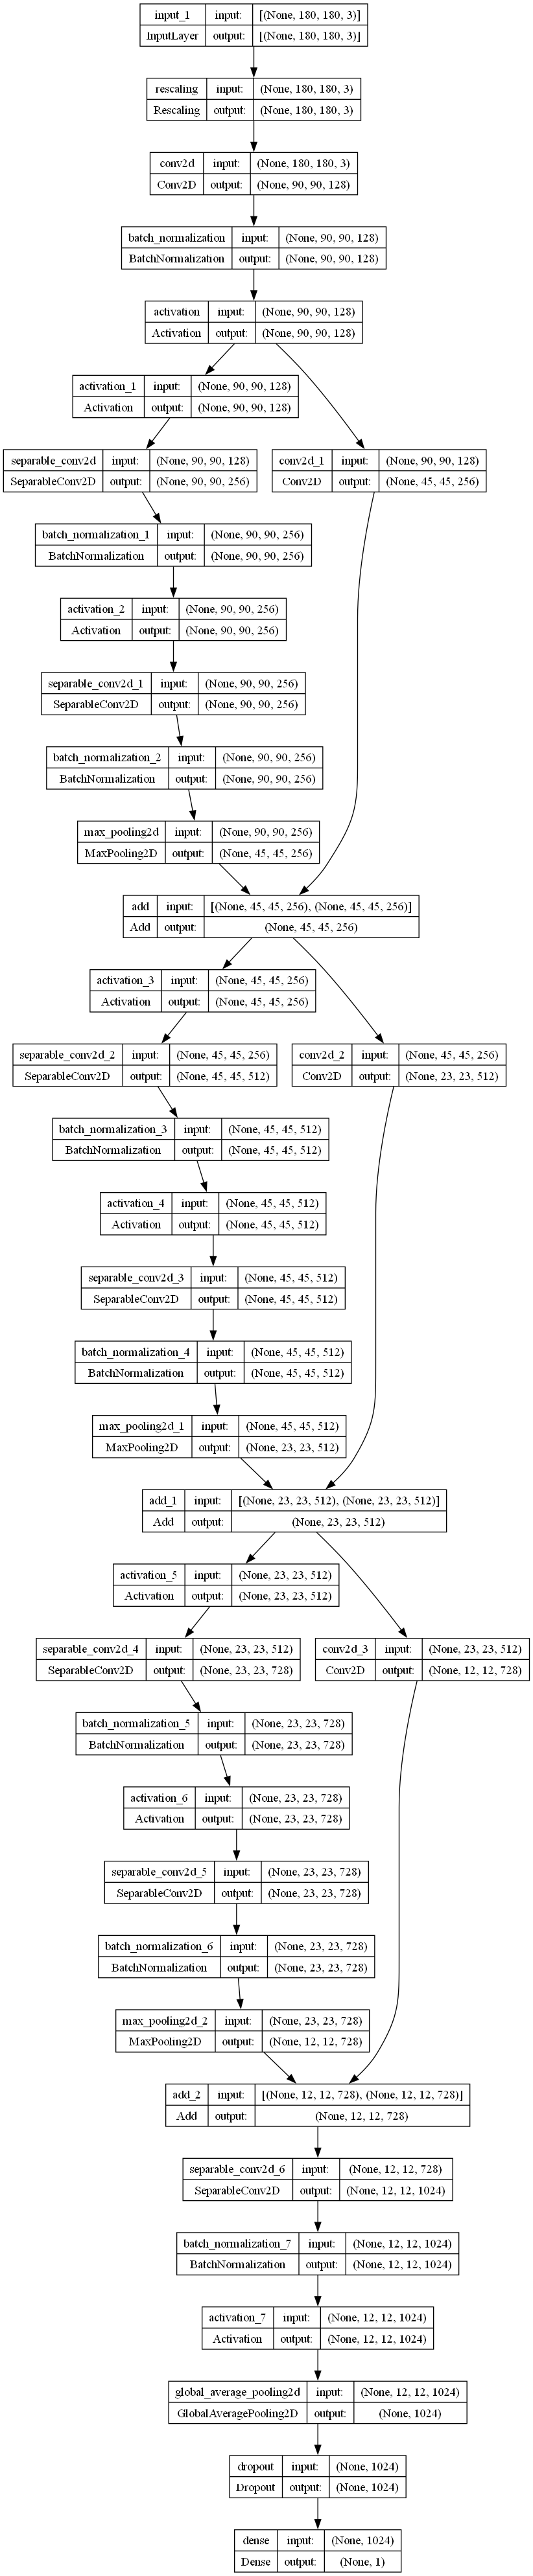

In [5]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [6]:
for layer_idx in range(len(model.layers)):
    print(f'{layer_idx}: {model.layers[layer_idx].name}')

print(f'{layer_idx}: {model.layers[-1].name}')

0: input_1
1: rescaling
2: conv2d
3: batch_normalization
4: activation
5: activation_1
6: separable_conv2d
7: batch_normalization_1
8: activation_2
9: separable_conv2d_1
10: batch_normalization_2
11: max_pooling2d
12: conv2d_1
13: add
14: activation_3
15: separable_conv2d_2
16: batch_normalization_3
17: activation_4
18: separable_conv2d_3
19: batch_normalization_4
20: max_pooling2d_1
21: conv2d_2
22: add_1
23: activation_5
24: separable_conv2d_4
25: batch_normalization_5
26: activation_6
27: separable_conv2d_5
28: batch_normalization_6
29: max_pooling2d_2
30: conv2d_3
31: add_2
32: separable_conv2d_6
33: batch_normalization_7
34: activation_7
35: global_average_pooling2d
36: dropout
37: dense
37: dense


# Plot Training Results

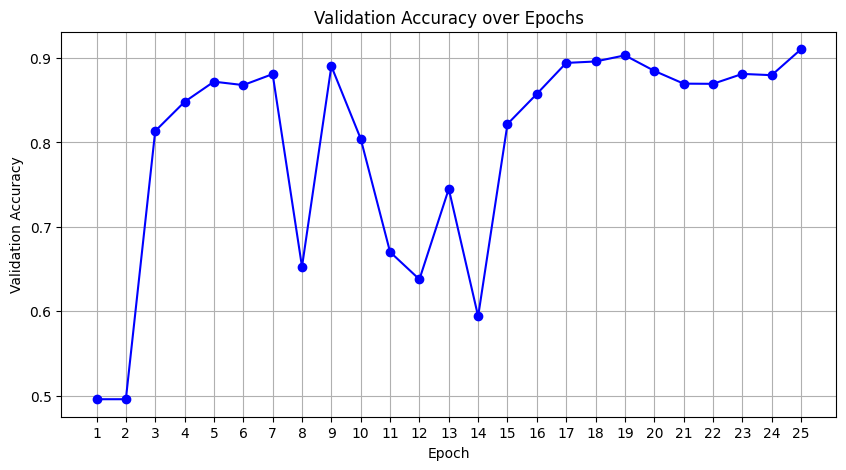

In [11]:
data = pd.read_csv('training_DC.log')

data['epoch'] = data['epoch'] + 1
plt.figure(figsize=(10, 5))
plt.plot(data['epoch'], data['val_acc'], marker='o', linestyle='-', color='b')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.xticks(data['epoch'])
plt.grid()
plt.show()

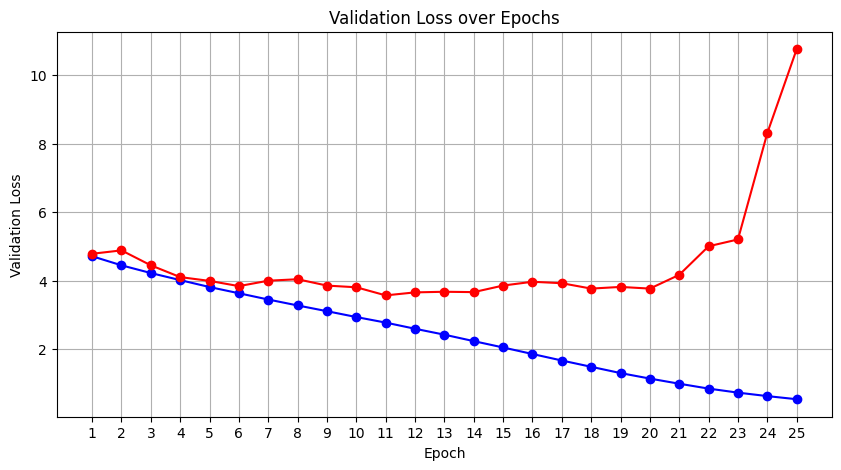

In [ ]:
data = pd.read_csv('training_DC.log')

data['epoch'] = data['epoch'] + 1
plt.figure(figsize=(10, 5))
plt.plot(data['epoch'], data['loss'], marker='o', linestyle='-', color='b')
plt.plot(data['epoch'], data['val_loss'], marker='o', linestyle='-', color='r')
plt.title('Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.xticks(data['epoch'])
plt.grid()
plt.show()

In [9]:
data_dir = "stanford_dogs/Images"
batch_size = 64
image_size = (180, 180)

ds_train = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical"
)

ds_test = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical"
)

Found 20570 files belonging to 120 classes.
Using 16456 files for training.
Found 20570 files belonging to 120 classes.
Using 4114 files for validation.


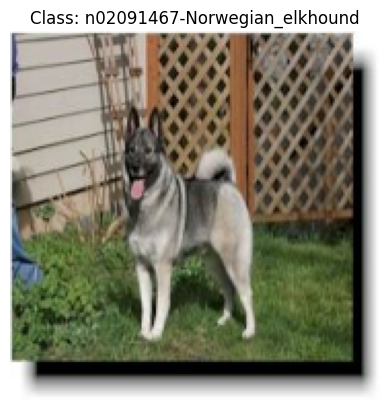

In [10]:
class_names = ds_train.class_names

import matplotlib.pyplot as plt

for image, label in ds_train.take(1):
    plt.imshow(image[0].numpy().astype("uint8"))
    plt.title(f"Class: {class_names[tf.argmax(label[0]).numpy()]}")
    plt.axis("off")
    plt.show()
    break